In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [38]:
sample_rate, audio_data = wav.read("chords/CmajMelody1.wav")

In [39]:
# if we have stereo input
if len(audio_data.shape) == 2:
    # pick out only one channel
    audio_data = audio_data[:, 0]

audio_data

array([  0,   0,   0, ..., -14, -14, -14], dtype=int16)

In [40]:
# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

In [41]:
for i in range(10):
    print(f"Frequency {fft_freq[i]} Hz, Magnitude: {abs(fft_result[i])}")

Frequency 0.0 Hz, Magnitude: 18970.0
Frequency 0.09237072287945305 Hz, Magnitude: 1149.606356369974
Frequency 0.1847414457589061 Hz, Magnitude: 2220.972392744737
Frequency 0.2771121686383592 Hz, Magnitude: 2886.224985854517
Frequency 0.3694828915178122 Hz, Magnitude: 2273.8869207325342
Frequency 0.46185361439726524 Hz, Magnitude: 2146.4577901428206
Frequency 0.5542243372767184 Hz, Magnitude: 1212.1488366432354
Frequency 0.6465950601561714 Hz, Magnitude: 1097.785095005226
Frequency 0.7389657830356244 Hz, Magnitude: 1508.770901080985
Frequency 0.8313365059150775 Hz, Magnitude: 1771.893523164115


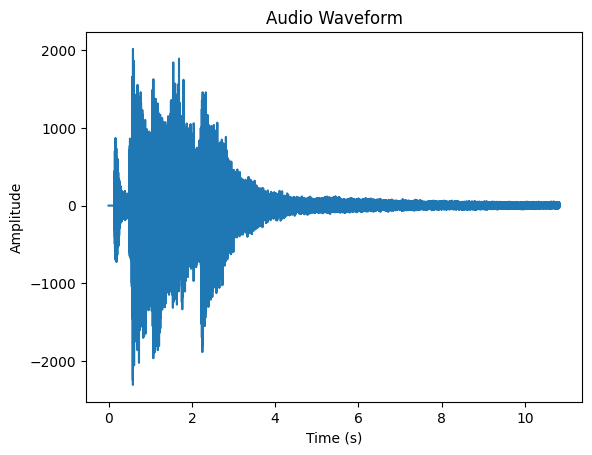

In [42]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

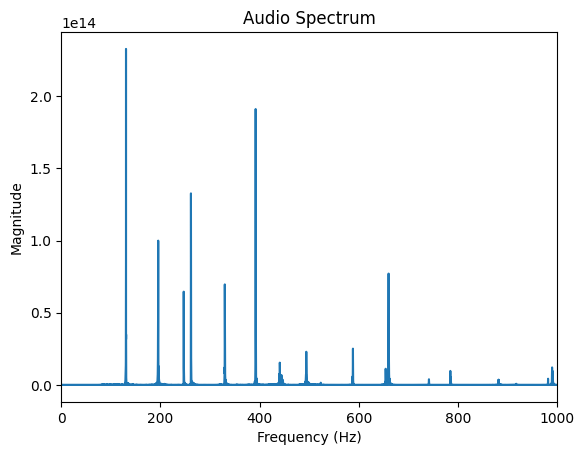

In [59]:
# Frequency Domain Plot

plt.plot(fft_freq, abs(fft_result)**2)  # Plot absolute values of frequency components
plt.xlim(0, 1000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.show()

In [51]:
# Extracting notes from the frequency domain plot
max_freq = np.argmax(abs(fft_result))
print(fft_freq[max_freq])

130.51983142866717


In [75]:
peaks, _ = find_peaks(abs(fft_result)**2, prominence=5e13, distance=30)

In [76]:
fft_freq[peaks].shape

(14,)

In [79]:
fft_freq[peaks]

array([ 130.51983143,  195.45644961,  246.81457153,  261.40914575,
        329.67110996,  391.83660645,  659.89644425, -659.89644425,
       -391.83660645, -329.67110996, -261.40914575, -246.81457153,
       -195.45644961, -130.51983143])